In [87]:
import glob
import pandas as pd
import numpy as np
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [3]:
AQMadrid = pd.read_csv('California Home Prices_2009.csv').dropna()

In [4]:
#AQMadrid = pd.DataFrame(AQMadrid.date.str.split('-',2).tolist(), columns = ['Year', 'Month', 'Day'])

In [5]:
status_Cate = []
for key in AQMadrid['Status']:
    if key == 'Short Sale':
        status_Cate.append(1)
    else:
        status_Cate.append(0)

AQMadrid['Status'] = status_Cate

In [6]:
AQMadrid = AQMadrid.drop(["MLS#", "Location"], axis=1)
AQMadrid = AQMadrid.astype('float')
AQMadrid['Price'] = np.log10(AQMadrid['Price'])
AQMadrid.head()

,Price,Bedrooms,Bathrooms,SQFT,Price/SQFT,Status
0,5.900367,3.0,3.0,2371.0,335.30,1.0
1,5.600973,4.0,3.0,2818.0,141.59,1.0
2,5.736397,4.0,3.0,3032.0,179.75,1.0
3,5.958564,4.0,4.0,3540.0,256.78,1.0
4,5.040998,3.0,1.0,1249.0,87.99,1.0


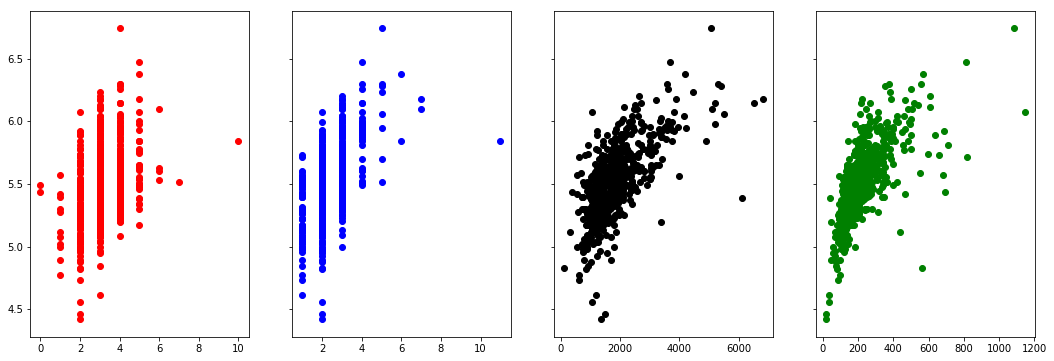

In [62]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey='all', sharex='none', figsize=(18,6))

ax1.scatter(AQMadrid['Bedrooms'], AQMadrid['Price'], color='r')

ax2.scatter(AQMadrid['Bathrooms'], AQMadrid['Price'], color='b')

ax3.scatter(AQMadrid['SQFT'], AQMadrid['Price'], color='k')

ax4.scatter(AQMadrid['Price/SQFT'], AQMadrid['Price'], color='g')

plt.show()

In [12]:
linear_formula = 'Price ~ Bedrooms+Bathrooms+SQFT+Price/SQFT+Status'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=AQMadrid).fit()
print("coefficients: \n" + str(lm.params))
print("P-Values: \n" + str(lm.pvalues))
print("R2: \n" + str(lm.rsquared))

coefficients: 
Intercept    -1.998401e-15
Bedrooms      7.216450e-16
Bathrooms     7.771561e-16
SQFT         -5.410169e-17
Price         1.000000e+00
Price:SQFT   -7.066288e-17
Status        1.110223e-16
dtype: float64
P-Values: 
Intercept     0.998750
Bedrooms      0.988792
Bathrooms     0.989784
SQFT          0.935628
Price         0.000000
Price:SQFT    0.532282
Status        0.998707
dtype: float64
R2: 
1.0


In [88]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = AQMadrid.Price.values.reshape(-1, 1)
X = AQMadrid[['Bedrooms','Bathrooms','SQFT','Price/SQFT','Status']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.03165702  0.00204455  0.00018914  0.00153661  0.0138282 ]]

Intercept: 
 [ 4.71327457]

R-squared:
0.849115934925


In [90]:
cross_val_score(regr, X, Y, cv=10)

array([ 0.92268804,  0.79213602,  0.84901835,  0.91077905,  0.70535032,
        0.91771202,  0.88434287,  0.82344202,  0.80165674,  0.72673325])

In [94]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = AQMadrid[['Bedrooms','Bathrooms','SQFT','Price/SQFT','Status']]
Y = pd.DataFrame(AQMadrid.Price)
knn.fit(X, Y)

# Set up our prediction line.
T = X

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

r2_score(Y,Y_)

1.0

In [96]:
cross_val_score(knn, X, Y, cv=5)

array([ 0.88251655,  0.93055884,  0.86703645,  0.92647409,  0.84389745])